# Project: E-commerce Sales and Customer Behavior Analysis

## Analysis
Analyze the sales data to identify trends, customer behaviors, and the impact of memberships on purchasing behavior.


### Load Libraries and Data

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [51]:
# Read the CSV file into a DataFrame using ISO-8859-1 encoding
df = pd.read_csv('data.csv', encoding='ISO-8859-1')

# Create a copy of the original DataFrame for backup or further manipulation
df_copy = df.copy()

### Inspection

In [52]:
# Inspect the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [53]:
# Use the describe method to generate summary statistics for numerical columns in the DataFrame
df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1243f6c90>,
 'caps': [<matplotlib.lines.Line2D at 0x12439ae50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1243ffc50>],
 'medians': [<matplotlib.lines.Line2D at 0x12434fd10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1243038d0>],
 'means': []}

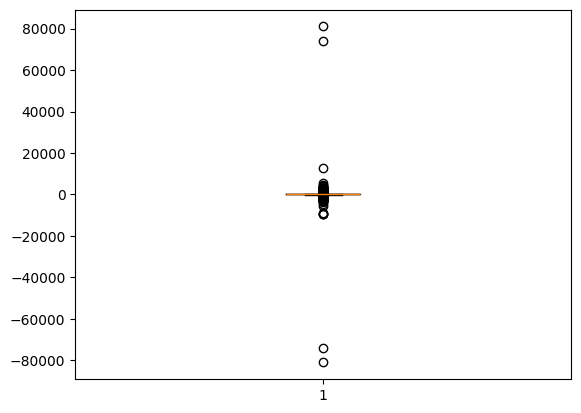

In [54]:
# Create a boxplot for the 'Quantity' column of the DataFrame to visualize its distribution, outliers, and quartiles
plt.boxplot(df['Quantity'])

### Data Cleaning and Prep

In [55]:
# Remove the additional white space from the beginning and end of descriptions
df['Description'] = df['Description'].str.strip()

# find stock codes with missing description information
stock_codes_to_clean = df[df['Description'].isnull()==True]['StockCode'].unique()

# create data frame to see the mix of descriptions for the the stock codes with errored descriptions
found_Descriptions = df[df['StockCode'].isin(stock_codes_to_clean)].sort_values('StockCode',ascending=False)

# Get the most frequent description for each stock code
most_frequent_description = df.groupby('StockCode')['Description'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else 'UNKNOWN')

# Map the most frequent description to the original DataFrame
df['Description'] = df['StockCode'].map(most_frequent_description)

# Create new column with transaction total
df['Total'] = df['Quantity'] * df['UnitPrice']

# Create a new colum to display Membership type based on customerid
df['Membership'] = np.where(df['CustomerID'].isnull(), 'Nonmember', 'Member')

# cast non null CustomerID values as integers
df.loc[df['CustomerID'].notna(), 'CustomerID'] = df.loc[df['CustomerID'].notna(), 'CustomerID'].apply(lambda x: str(x)[:-2])
df.loc[df['CustomerID'].notna(), 'CustomerID'] = df.loc[df['CustomerID'].notna(), 'CustomerID'].astype('int64')

# fill missing CustomerID with Nonmember string
df['CustomerID'].fillna('Nonmember', inplace=True)

# Reformat Date column
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Extract the year
df['Year'] = df['InvoiceDate'].dt.year

# Extract the month of the year
df['Month'] = df['InvoiceDate'].dt.month

# Extract day
df['Day'] = df['InvoiceDate'].dt.day

# Extract the hour of the day
df['Hour'] = df['InvoiceDate'].dt.hour

# Extract day of the week
df['Day_name'] = df['InvoiceDate'].dt.day_name()

In [56]:
# create a data frame with positive quantity and sales values
customer_purchases_df = df[(df['Quantity']>0) & (df['UnitPrice']>=0)].reset_index().drop(columns='index')

# view new data frame
customer_purchases_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531283 entries, 0 to 531282
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531283 non-null  object        
 1   StockCode    531283 non-null  object        
 2   Description  531283 non-null  object        
 3   Quantity     531283 non-null  int64         
 4   InvoiceDate  531283 non-null  datetime64[ns]
 5   UnitPrice    531283 non-null  float64       
 6   CustomerID   531283 non-null  object        
 7   Country      531283 non-null  object        
 8   Total        531283 non-null  float64       
 9   Membership   531283 non-null  object        
 10  Year         531283 non-null  int32         
 11  Month        531283 non-null  int32         
 12  Day          531283 non-null  int32         
 13  Hour         531283 non-null  int32         
 14  Day_name     531283 non-null  object        
dtypes: datetime64[ns](1), float64(2), 

In [57]:
# Generate summary statistics for numerical columns in the customer_purchases_df DataFrame
customer_purchases_df.describe()

,Quantity,InvoiceDate,UnitPrice,Total,Year,Month,Day,Hour
count,531283.000000,531283,531283.000000,531283.000000,531283.000000,531283.000000,531283.000000,531283.000000
mean,10.655299,2011-07-04 18:15:33.177910016,3.898954,20.077218,2010.921543,7.560242,15.024706,13.076255
min,1.000000,2010-12-01 08:26:00,0.000000,0.000000,2010.000000,1.000000,1.000000,6.000000
25%,1.000000,2011-03-28 11:59:00,1.250000,3.750000,2011.000000,5.000000,7.000000,11.000000
50%,3.000000,2011-07-20 12:01:00,2.080000,9.900000,2011.000000,8.000000,15.000000,13.000000
75%,10.000000,2011-10-19 12:35:00,4.130000,17.700000,2011.000000,11.000000,22.000000,15.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,168469.600000,2011.000000,12.000000,31.000000,20.000000
std,156.830617,NaN,35.876279,270.058254,0.268890,3.508723,8.662171,2.438307


### EDA

In [58]:
# Create data frame from numerical columns quantity and unit price
num_cols = customer_purchases_df[['Quantity','UnitPrice']]

# Show summary statistics for these columns
num_cols.describe()

# Number of transactions across countries
trans_by_country = customer_purchases_df.groupby('Country')['Country'].value_counts().reset_index().sort_values(by='count',ascending=False)

# Create bar chart
fig = px.bar(trans_by_country, x='count', y='Country',
             hover_data=['count', 'Country'], color='count',
             labels={'count':'Transactions'}, height=400)
fig.show()

In [59]:
# Create data frame for sales by country
sorted_sales_by_country = customer_purchases_df.groupby('Country')['Total'].sum().reset_index().sort_values(by='Total',ascending=False)

# Create bar chart
fig = px.bar(sorted_sales_by_country, x='Total', y='Country',
             hover_data=['Total', 'Country'], color='Total',
             labels={'Total':'Total Sales'}, height=400)
fig.show()

### Sales Trend Analysis

In [60]:
# Group the customer_purchases_df DataFrame by 'InvoiceDate' and sum up the 'Total' sales for each date
sales_by_date = customer_purchases_df.groupby('InvoiceDate')['Total'].sum().reset_index()

# Create a line chart using Plotly Express to visualize the sales data over time
# The x-axis represents the 'InvoiceDate' and the y-axis represents the 'Total' sales
# The chart includes a title and axis labels
fig = px.line(sales_by_date, x='InvoiceDate', y='Total', title='Sales Over Time', labels={'InvoiceDate': 'Dates'})

# Display the line chart
fig.show()


In [61]:
# Group the customer_purchases_df DataFrame by 'Description' (product name) and sum up the 'Total' sales for each product
# Sort the summed values in descending order to get the top-selling products
sorted_sales_per_product = customer_purchases_df.groupby('Description')['Total'].sum().reset_index().sort_values(by='Total', ascending=False)

# Create a horizontal bar chart using Plotly Express to visualize the top 10 selling products
# The y-axis represents the 'Description' (product name) and the x-axis represents the 'Total' sales
# The chart includes a title and axis labels, and colors the bars based on total sales
fig = px.bar(sorted_sales_per_product[:10], x='Total', y='Description', title='Sales By Product', labels={'Description': 'Product', 'Total': 'Total Sales'}, color='Total')

# Display the bar chart
fig.show()

### Customer Behavior Analysis

In [66]:
# Group the customer_purchases_df DataFrame by 'InvoiceNo' and sum up both 'Quantity' and 'Total' for each invoice
# Reset the index for easier manipulation
by_quant = customer_purchases_df.groupby(['InvoiceNo'])[['Quantity', 'Total']].sum().reset_index()

# Create a scatter plot using Plotly Express
# The x-axis represents the summed 'Quantity' of items purchased in each invoice
# The y-axis represents the summed 'Total' sales for each invoice
# A trendline is added to the scatter plot using Ordinary Least Squares (OLS) method for linear fitting
fig = px.scatter(x=by_quant['Quantity'].values, y=by_quant['Total'].values, labels={'x': 'Number of Items Purchased', 'y': 'Total Sales'}, trendline='ols')

# Display the scatter plot
fig.show()


### Membership Analysis

In [63]:
# Count the occurrences of each membership type in the customer_purchases_df DataFrame and reset the index
mem_count = customer_purchases_df['Membership'].value_counts().reset_index()

# Group the customer_purchases_df DataFrame by 'Membership' and sum up the 'Total' sales for each membership type
# Reset the index for easier merging
mem_sales = customer_purchases_df.groupby('Membership')['Total'].sum().reset_index()

# Merge the two DataFrames, mem_sales and mem_count, on the 'Membership' column to get total sales and count in a single DataFrame
merged_mem = pd.merge(mem_sales, mem_count, on='Membership', how='inner')

# Calculate the average sale total in dollars for each membership type and add it as a new column named 'Average'
merged_mem['Average'] = merged_mem['Total'] / merged_mem['count']

# Create a bar chart using Plotly Express to visualize the average sales total in dollars for each membership type
# Hover data shows both the 'Average' and 'Membership' values
# Labels are customized for better understanding of the chart
fig = px.bar(merged_mem, x='Membership', y='Average',
             hover_data=['Average', 'Membership'],
             labels={'Average': 'Average Sale Total Dollars', 'Membership': 'Membership Type'})

# Display the bar chart
fig.show()


### Product Analysis

In [67]:
# Sales by Product
sorted_quant_per_product = customer_purchases_df.groupby('Description')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False)

fig = px.bar(sorted_quant_per_product[:10], x='Quantity', y='Description',title='Quantity By Product',labels={'Description':'Product','Quantity':'Total Quantity'},color='Quantity')
fig.show()